# Etude d'un pendule simple

__But :__ à l’aide d’un langage de programmation, mettre en évidence le non isochronisme des oscillations d'un pendule.

## Position du problème
Nous allons chercher à étudier les oscillations d'un pendule simple :
1. Aux petites oscillations. Ce sera l'occasion de tester le schéma d'Euler mis en place pour étudier le système en le comparant aux attentes.
2. Pour des oscillations quelconques. On cherchera alors à déterminer la période des oscillations en fonction de l'amplitude pour observer le __non isochoronisme des oscillations__. On comparera notamment les résultats trouvés à la formule théorique faisant intervenir une intégrale.

### Mise en équation
On considère un pendule simple de longueur $l$ sans sources d'amortissement dans un champ de pesanteur uniforme $g$. La masse au bout du pendule est $m$.

Pour les applications numériques, on prendra $l = 1 m; g = 9.81 m.s^{-2}; m=1 kg$.

On rappelle que la mise en équation du pendule amène à l'équation :

$$
\ddot \theta + {g \over l} \sin \theta = 0
$$

qui devient aux petits angles :

$$
\ddot \theta + {g \over l} \theta = 0
$$

L'énergie potentielle de pesanteur s'écrit :

$$
E_p(\theta) = mgl(1 - \cos \theta)
$$

et l'énergie cinétique : $E_c = {1 \over 2} m l^2 \dot \theta^2$

### Schéma d'Euler
On va utiliser un schéma d'Euler explicite. Le système étant d'ordre 2, on utilise un système d'équations différentielles définit par la relation vectorielle :

$$
\frac{\rm{d}Y}{\rm{dt}} = F(t, Y(t))
$$

où 
$ Y(t) = \begin{pmatrix}
\theta(t)\\
\dot \theta(t)
\end{pmatrix}
$

Pour des valeurs discrètes $Y_k$ aux temps $t_k$ (on notera $x_k$ et $v_k$ les valeurs de $\theta(t)$ et $\dot \theta(t)$ aux temps $t_k$), on peut approcher la dérivée de la fonction entre $t_k$ et $t_{k+1}$ par :

$$
\frac{\rm{d}Y}{\rm{dt}} = {Y_{k+1} - Y_{k} \over t_{k+1} - t_k}
$$

soit, en notant $h = t_{k+1} - t_k$ :

$$
Y_{k+1} = Y_k + h \times F(t_k, Y(t_k))
$$

On a la relation de récurrence qui définit les $Y_k$ par le schéma d'Euler (explicite).

## Implémentation du schéma d'Euler
Cette fois, on va directement raisonner avec le __vecteur $Y_k$__ et non avec deux grandeurs séparées $\theta_k$ et $\dot \theta_k$

>  __Exercice 1 :__  
> Vous devez :
> 1. Ecrire une fonction `F_petit` qui prend comme argument un flottant `t` et un vecteur `Y` à deux éléments et qui renvoie le vecteur `F(t, Y)` dans le cas d'un pendule aux petites oscillations.
> 2. Ecrire une fonction `euler` qui prend comme arguments :
>     * une fonction `F` (semblable à `F_petit` qui prendra le même type d'arguments et renverra le même type de vecteur).
>     * un vecteur `Y0` donnant les __deux__ conditions initiales (ici à $t=0$) sur les deux composants de `Y`
>     * un flottant `h` qui sera le pas d'intégration $h = t_{k+1} - t_k$
>     * un flottant `tf` qui sera le temps final de l'intégration.
>     et qui renvoie :
>     * un vecteur contenant les temps $t_k$ et un tableau à 2 colonnes contenant respectivement : les angles $\theta_k$ et les vitesses angulaires $\dot \theta_k$.

_Données utiles :_  
* Pour créer un tableau, de taille N lignes et 2 colonnes rempli de 0, la syntaxe est `np.zeros((N, 2))`. A vous de prévoir le nombre de lignes du tableau.
* La sélection de la ligne d'indice i d'un tableau se fait par `tableau[i]`. Attention, les indices commencent à 0 et se terminent à N-1.
* La sélection de l'élément d'indice (i, j) d'un tableau se fait par `tableau[i, j]`. Attention, les indices commencent à 0 et se terminent à N-1.
* Vous pouvez remplier directement une ligne d'un tableau numpy par la syntaxe `tableau[indice_ligne] = [v1, v2]`

In [1]:
"""
Ne pas oublier d'importer les bibliothèques scientifiques.
"""
import numpy as np
import matplotlib.pyplot as plt

g = 9.81  # Champ de pesanteur
l = 1  # Longueur du pendule
m = 1  # Masse

def F_petit(t, Y):
    """Fonction F pour les petites oscillations"""
    return np.array([Y[1], - g / l * Y[0]])


def euler(F, Y0, h, tf):
    N = int(tf / h)  # Nombre de points
    temps = np.zeros(N)  # Vecteur des temps
    sol = np.zeros((N, 2))  # Tableau des solutions
    temps[0] = 0  # Initialisation du vecteur temps (inutile ici en réalité)
    sol[0] = [Y0[0], Y0[1]]  # Initialisation du tableau
    for i in range(1, N):  # On commence à puisqu'on a déjà rempli le 0
        dY = F(temps[i - 1], sol[i - 1])
        newtemps = temps[i - 1] + h
        newY = sol[i - 1] + h * dY
        temps[i] = newtemps
        sol[i] = newY
    return temps, sol
        

## Test sur le système aux petits angles

### Intégration numérique
> __Exercice 2 :__  
> Vous devez :
> 1. Ecrire une fonction `sol_ptangle` qui prend comme argument un temps `t` et un vecteur à deux éléments `Y0` et qui renvoie la solution analytique de l'équation du pendule simple aux petits angles avec comme conditions initiales les élements du vecteur `Y0` à l'instant `t`. Cette fonction devra être vectorialisable c'est-à-dire qu'elle doit pouvoir s'appliquer correctement que `t` soit un flottant ou un vecteur numpy.
> 2. Utiliser la fonction `euler` pour résoudre numériquement le cas du pendule aux petits angles en supposant que le pendule par du point le plus bas avec une vitesse angulaire $\omega_i = .1 rad/s$. Tracer alors sur le même graphique la solution analytique et la solution numérique pour les comparer. __On réfléchira au choix du pas d'intégration et à l'intervale de temps $[0, t_f]$ d'étude.__

_Données utiles :_  
* Pour sélectionner une colonne d'un tableau, on utilise la syntaxe `tableau[:, i]` où `i` est l'indice de la colonne (qui démarre à 0).

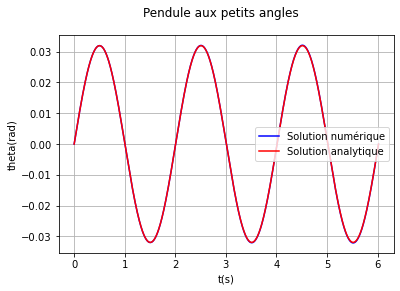

In [2]:
def sol_ptangle(t, Y0):
    """Solution analytique d'un OH caclulé au temps t"""
    w0 = np.sqrt(g / l)
    return Y0[0] * np.cos(w0 * t) + Y0[1] / w0 * np.sin(w0 * t)


omegai = 0.1  # Vitesse angulaire initiale
T0 = 2 * np.pi * np.sqrt(l / g)  # Période propre
h = T0 / 1e4  # Un pas correspondant à 1/10000 de la période propre.
tf = 3 * T0  # Tracé sur trois période
tsol_ptnum, Ysol_ptnum = euler(F_petit, [0, omegai], h, tf)


ysol_ptana = sol_ptangle(tsol_ptnum, [0, omegai])  # Calcul de la solution analytique aux mêmes temps

"""
Tracé graphique pour comparaison."""
f, ax = plt.subplots()
f.suptitle("Pendule aux petits angles")
ax.set_xlabel("t(s)")
ax.set_ylabel("theta(rad)")
ax.plot(tsol_ptnum, Ysol_ptnum[:, 0], label="Solution numérique", color='blue')
ax.plot(tsol_ptnum, ysol_ptana, label="Solution analytique", color="red")
ax.legend()
ax.grid()
plt.show()

La solution est correcte.

__NOTE :__ Essayer avec un pas plus faible ($h = T_0 / 1000$) et vous verrez que l'amplitude des oscillations grandit lentement : l'énergie dérive. C'est un problème qu'on observe avec le schéma d'intégration d'Euler qui ne conserve malheureusement pas l'énergie.

### Détermination de la période.
Par la suite, le signal ne sera plus forcément sinusoïdal mais restera périodique, on va chercher à déterminer la période du signal obtenu par résolution numérique.

__Méthode choisie__ : On va déterminer les temps $t_{0i}$ successifs des points où la solution numérique pour $\theta(t)$ s'annule. Comme il n'y a que 2 annulations des angles dans une période (cf. étude des systèmes conservatifs), il suffira de compter le nombre $N_0$ de 0. La période $T$ du signal s'écrit alors :

$$
T = {t_{0N_0} - t_{01} \over {N_0 - 1 \over  2}}
$$

> __Exercice 3 :__  
> 1. Ecrire une fonction `periode` qui prend en arguments deux vecteurs de mêmes taille `tk` et `thetak` et qui renvoie la période du signal `thetak` en considérant les `tk` comme les temps associés.
> 2. Tester votre fonction sur le signal intégré numériquement pour vérifier que vous trouvez bien la bonne période.

In [3]:
def periode(tk, thetak):
    """Fonction qui renvoie la période d'un signal période thetak exprimé aux temps tk"""
    tps0 = []  # On va stocker les temps où le signal s'annule dans cette liste
    """Remarque : on n'utilise pas ici de vecteur numpy car on ne connaît pas à l'avance la taille de tps0"""
    N = len(thetak)
    for i in range(1, N):
        if thetak[i] * thetak[i - 1] < 0:  # Le signal change de signe
            tps0.append((tk[i] + tk[i-1]) / 2)  # On ajoute le temps moyen à la liste des zéros.
    N0 = len(tps0)  # Nombre de zéros.
    if N0 > 0:
        per = (tps0[-1] - tps0[0]) / ((N0 - 1) / 2)
    else:
        per = 0
    return per

per_pt = periode(tsol_ptnum, Ysol_ptnum[:, 0])

print("-----------------")
print("Période estimée : {} s".format(per_pt))
print("Période propre : {} s".format(T0))
print("-----------------")

-----------------
Période estimée : 2.006066680709236 s
Période propre : 2.0060666807106475 s
-----------------


On peut considérer la méthode comme correcte.

## Anisochronisme des grandes oscillations.
On a observé théoriquement que la période des oscillations dépendaient aux fortes amplitudes des oscillations. Son expression théorique est :

$$
T = 4 \int_0^{\theta_0} {d\theta \over \sqrt{{2g \over l}(\cos \theta - \cos \theta_0)}}
$$


> __Exercice 4 :__
> 1. Pour une liste d'amplitude angulaire entre 0 et $\pi$ (non inclus) (5 valeurs), vous devez :
>     * Procéder à l'intégration numérique de l'évolution de l'angle _sans approximation_ pour l'amplitude considérée et la solution analytique aux petits angles
>     * Tracer sur deux graphiques : l'évolution temporelle de $\theta(t)$ et le portrait de phase du pendule our l'amplitude considérée.
>     * Comparer à chaque fois la solution aux petits angles et la solution numérique trouvée.
> 2. Ecrire une fonction `periode_borda` qui renvoie pour une amplitude `theta0` donnée la période approchée par la formule de Borda
> 2. Pour une liste d'amplitude angulaire entre $\pi / 50$ et $\pi$ (non inclus) (49 valeurs), vous devez déterminer pour chaque amplitude la période des oscillations pour le signal obtenu numériquement $T_{num}(\theta_0)$ et par la formule de Borda $T_{Borda}(\theta_0)$ puis représenter les deux périodes en fonction de l'amplitude.
>     * Observer alors l'anisochronisme des oscillations
>     * Comparer les résultats obtenus par l'intégrale et par intégration numérique de l'équation différentielle. A partir de quand doit-on considérer la formule de Borda non acceptable.

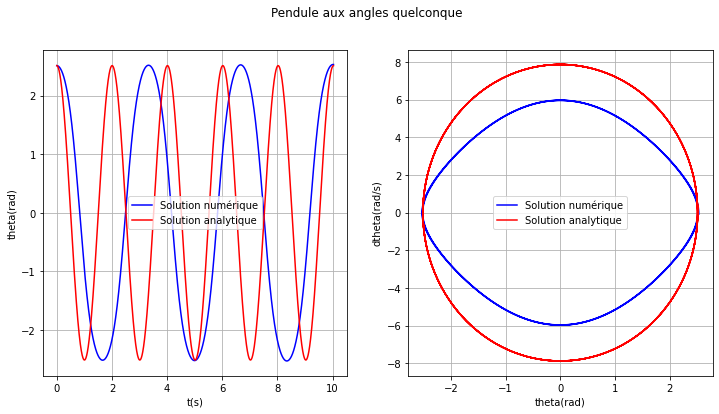

In [4]:
Lamp = np.arange(5) * np.pi/ 5  # Liste des valeurs d'amplitude

""" Pour des questions de visibilité, on ne trace qu'une seule amplitude à chaque fois.
On pourra faire une animation mais ce n'est pas dans le cadre du programme
"""
indice = 4  # Indice à modifier pour observer une autre amplitude.
ampl = Lamp[indice]


def F_grand(t, Y):
    """Renvoie la fonction F pour le schéma d'Euler aux angles quelconques"""
    return np.array([Y[1], - g / l * np.sin(Y[0])])


def dsol_ptangle(t, Y0):
    """Solution analytique de la vitesse angulaire d'un OH caclulé au temps t"""
    w0 = np.sqrt(g / l)
    return - w0 * Y0[0] * np.sin(w0 * t) + Y0[1] * np.cos(w0 * t)

tf = 5 * T0  # On modifie le temps final car on s'attend à une augmentation de la période.
tsol_num, Ysol_num = euler(F_grand, [ampl, 0], h, tf)

"""Solution analytique"""
ysol_ana = sol_ptangle(tsol_num, [ampl, 0])  # Calcul de la solution analytique aux mêmes temps
dysol_ana = dsol_ptangle(tsol_num, [ampl, 0])  # Calcul de la solution analytique aux mêmes temps

"""
Tracé graphique pour comparaison."""
f, ax = plt.subplots(1, 2, figsize=(12, 6))
f.suptitle("Pendule aux angles quelconque")
# Tracé temporel
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("theta(rad)")
ax[0].plot(tsol_num, Ysol_num[:, 0], label="Solution numérique", color='blue')
ax[0].plot(tsol_num, ysol_ana, label="Solution analytique", color="red")
ax[0].legend()
ax[0].grid()

# Portrait de phase
ax[1].set_xlabel("theta(rad)")
ax[1].set_ylabel("dtheta(rad/s)")
ax[1].plot(Ysol_num[:, 0], Ysol_num[:, 1], label="Solution numérique", color='blue')
ax[1].plot(ysol_ana, dysol_ana, label="Solution analytique", color="red")
ax[1].legend()
ax[1].grid()

plt.show()

On observe qu'en augmentant l'amplitude, 
* le signal commence par garder une allure presque sinusoïdal mais la période n'est plus la période propre.
* en augmentant encore l'amplitude, l'allure temporelle n'est même plus sinusoïdal (on observe d'ailleurs que le portrait de phase n'est plus une ellipse).

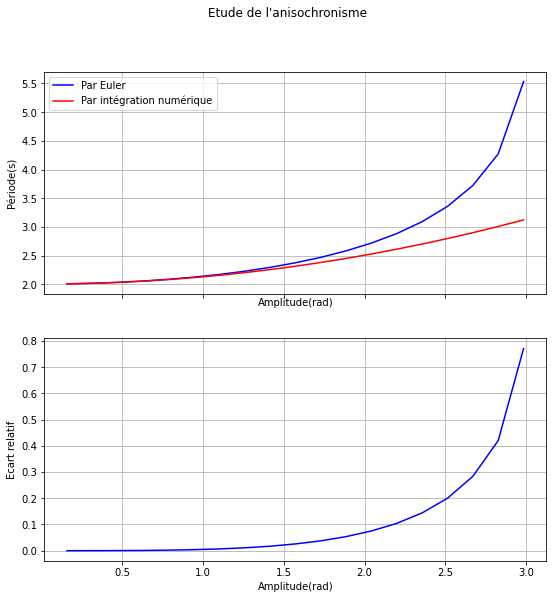

In [5]:
"""Etude de la période"""
Namp = 20  # Nombre d'amplitudes étudiées
Lamp = np.arange(1, Namp) * np.pi/ Namp  # Amplitudes étudiées
tf = 10 * T0  # On modifie le temps final car on s'attend à une augmentation de la période.

def periode_borda(theta0):
    T0 = 2 * np.pi * np.sqrt(l / g)
    """Calcul de l'intégrande pour l'intégration numérique"""
    return T0 * (1 + theta0 ** 2 / 16)


"""
Cette fois, on réalise bien un boucle sur toutes les amplitudes pour déterminer la période.
"""
per_num = np.zeros(Namp - 1)  # On va y stocker les périodes estimées
per_ana = np.zeros(Namp - 1)
Nint = 10000  # Nombres de trapèzes pour l'intégration numérique
for i in range(Namp - 1):
    ampl = Lamp[i]
    tsol_num, Ysol_num = euler(F_grand, [ampl, 0], h, tf)
    per = periode(tsol_num, Ysol_num[:, 0])
    pera = periode_borda(ampl)
    per_num[i] = per
    per_ana[i] = pera

f, ax = plt.subplots(2, 1, figsize=(9, 9), sharex='col')
f.suptitle("Etude de l'anisochronisme")
ax[0].set_xlabel("Amplitude(rad)")
ax[0].set_ylabel("Période(s)")
ax[0].plot(Lamp, per_num, label="Par Euler", color="blue")
ax[0].plot(Lamp, per_ana, label="Par intégration numérique", color="red")

ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Amplitude(rad)")
ax[1].set_ylabel("Ecart relatif")
ax[1].plot(Lamp, (per_num - per_ana) / per_ana, color="blue")

ax[1].grid()
plt.show()

* On observe comme attendu que la période dépend de l'amplitude et qu'elle diverge quand on s'approche d'une amplitude de $\pi$.
* La formule de Borda reste valable jusqu'à environ 1 rad  soit environ 60°

## Trajectoire de diffusion
On s'intéresse au cas où le pendule part de sa position la plus basse avec une vitesse angulaire $\omega_i$.

> __Exercice 5 :__  
> 1. Déterminer par le calcul la pulsation $\omega_i$ qui permet d'atteindre l'angle $\pi$ et de s'y arrêter. En théorie, quel temps met-on pour atteindre ce point ?
> 2. Intégrer l'équation du pendule avec la valeur de $\omega_i$ précédente et observer l'allure de $\theta(t)$ et $\dot \theta(t)$. Commenter
> 3. Intégrer l'équation du pendule avec une valeur de $\omega_i$ supérieure à celle trouvée précédemment et observer l'allure de $\theta(t)$ et $\dot \theta(t)$. Commenter.

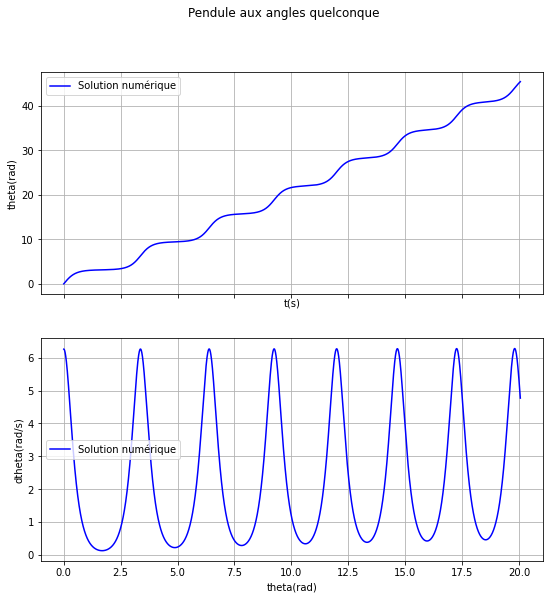

In [6]:
"""Etude du cas limite"""

omegai_lim = np.sqrt(4 * g / l)
#omegai_lim = np.sqrt(4 * g / l)  - 1e-2 # A tester dans un second temps

tf = 10 * T0  # On modifie le temps final car on s'attend à une augmentation de la période.
tsol_num, Ysol_num = euler(F_grand, [0, omegai_lim], h, tf)


"""
Tracé graphique pour comparaison."""
f, ax = plt.subplots(2, 1, figsize=(9, 9), sharex='col')
f.suptitle("Pendule aux angles quelconque")
# Tracé temporel
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("theta(rad)")
ax[0].plot(tsol_num, Ysol_num[:, 0], label="Solution numérique", color='blue')
ax[0].legend()
ax[0].grid()

# Portrait de phase
ax[1].set_xlabel("theta(rad)")
ax[1].set_ylabel("dtheta(rad/s)")
ax[1].plot(tsol_num, Ysol_num[:, 1], label="Solution numérique", color='blue')
ax[1].legend()
ax[1].grid()

plt.show()

Alors que le système devrait mettre un temps infini pour attendre $\pi$ et ne pas osciller, on observe que l'angle augmente indéfiniment comme une "_trajectoire de diffusion_" ! Ce n'est pas la réponse physique attendue. Le problème est numérique et a deux causes : 
* La première et la valeur approchée des calculs des flottants. $\omega_i$ calculé peut être légèrement supérieure à la valeur limite : on passe sur la trajectoire de diffusion.
* Même si on mets un écart (de $10^{-2}$ si vous décommentez la ligne 2 du script), on observation un système qui diverge. Ce n'est donc pas que la valeur de $\omega_i$ le problème mais aussi le __schéma d'intégration d'Euler qui ne conserve pas l'énergie mécanique.__ Dans le cas présent, il a tendance à l'augmenter légèrement (on peut déjà l'observer avec la première valeur de $\omega_i$ en remarquant que la valeur minimale ($ \theta = 0 [2\pi]$) de la vitesse augmente au cours du temp)s).

Comme expliqué à plusieurs reprises c'est un problème inhérent au schéma d'Euler explicite qui peut poser des problèmes pour des systèmes conservatifs aux temps longs (dynamique moléculaire par exemple). Une première méthode pour _diminuer_ ce phénomène consiste à réduire le pas d'intégration mais au prix d'un temps de calcul qui augmente. Des algorithmes (dits _symplectiques_) permettent de résoudre ce problème en bornant l'énergie mécanique (elle fluctue mais reste dans un intervalle dont la largeur diminue avec le pas d'intégration). A titre d'exemple, on peut citer les méthodes _d'[Euler symplectique](https://fr.wikipedia.org/wiki/M%C3%A9thode_d%27Euler_semi-implicite), [saute-mouton](https://fr.wikipedia.org/wiki/M%C3%A9thode_saute-mouton) et de [Loup-Verlet](https://fr.wikipedia.org/wiki/Int%C3%A9gration_de_Verlet)._

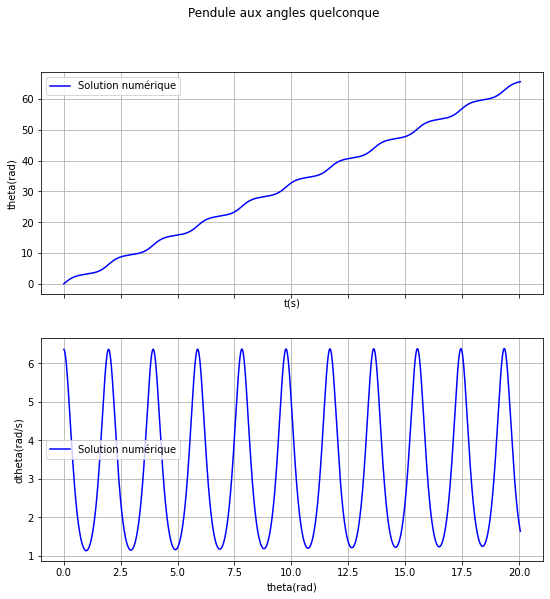

In [7]:
"""Etude d'un cas de diffusion"""

omegai_lim = np.sqrt(4 * g / l) + 0.1

tf = 10 * T0  # On modifie le temps final car on s'attend à une augmentation de la période.
tsol_num, Ysol_num = euler(F_grand, [0, omegai_lim], h, tf)


"""
Tracé graphique pour comparaison."""
f, ax = plt.subplots(2, 1, figsize=(9, 9), sharex='col')
f.suptitle("Pendule aux angles quelconque")
# Tracé temporel
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("theta(rad)")
ax[0].plot(tsol_num, Ysol_num[:, 0], label="Solution numérique", color='blue')
ax[0].legend()
ax[0].grid()

# Portrait de phase
ax[1].set_xlabel("theta(rad)")
ax[1].set_ylabel("dtheta(rad/s)")
ax[1].plot(tsol_num, Ysol_num[:, 1], label="Solution numérique", color='blue')
ax[1].legend()
ax[1].grid()

plt.show()

## Complément : Utilisation d'une méthode symplectique
On présente ici l'utilisation d'Euler symplectique pour voir son influence sur l'énergie mécanique. On va le comparer avec Euler implicite.

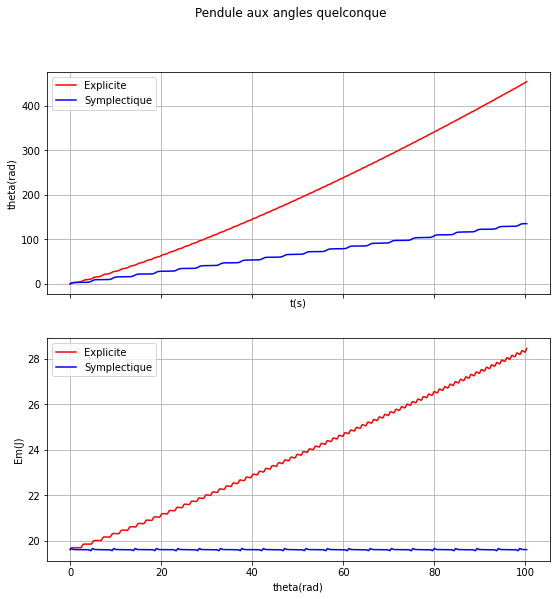

In [8]:
def Em(theta, dtheta):
    """Calcul de l'énergie mécanique"""
    return m/2 * l ** 2 * dtheta **2 + m*g*l * (1 - np.cos(theta))

"""La méthode ne se prête pas bien à l'utilisation des vecteurs
car on utilise v(k+1) pour calculer y(k+1) et non v(k). 
On doit donc changer F pour qu'elle ne renvoie que la valeur pour v.
On garde ici l'utilisation du vecteur Y pour reprendre ce qui a déjà été
écrit dans la fonction euler.
"""

def F_symp(t, Y):
    """Renvoie la fonction F pour le schéma d'Euler aux angles quelconques"""
    return - g / l * np.sin(Y[0])

def euler_symplectique(F, Y0, h, tf):
    N = int(tf / h)  # Nombre de points
    temps = np.zeros(N)  # Vecteur des temps
    sol = np.zeros((N, 2))  # Tableau des solutions
    temps[0] = 0  # Initialisation du vecteur temps (inutile ici en réalité)
    sol[0] = [Y0[0], Y0[1]]  # Initialisation du tableau
    for i in range(1, N):  # On commence à puisqu'on a déjà rempli le 0
        newtemps = temps[i - 1] + h
        newdtheta = F(temps[i - 1], sol[i - 1])  # Nouvelle vitesse angulaire
        vtheta = sol[i-1, 1] + h * newdtheta
        newtheta = sol[i - 1, 0] + h * vtheta
        temps[i] = newtemps
        sol[i] = [newtheta, vtheta]
    return temps, sol


"""Etude du cas limite"""

"""A cause de l'approximation des flottants, on est obligé de prendre omegai 
légèrement inférieur à sa valeur limite."""
omegai_lim = np.sqrt(4 * g / l)
#omegai_lim = np.sqrt(4 * g / l)  - 1e-4 # A tester dans un second temps
#omegai_lim = np.sqrt(4 * g / l)  - 0.5 # A tester dans un troisième temps

tf = 50 * T0  # On modifie le temps final car on s'attend à une augmentation de la période.
h = T0 / 1e3  # On diminue h pour des questions de temps de calcul (observation sur un temps long)
tsol_num, Ysol_num = euler(F_grand, [0, omegai_lim], h, tf)
tsol_num2, Ysol_num2 = euler_symplectique(F_symp, [0, omegai_lim], h, tf)


"""
Tracé graphique pour comparaison."""
f, ax = plt.subplots(2, 1, figsize=(9, 9), sharex='col')
f.suptitle("Pendule aux angles quelconque")
# Tracé temporel
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("theta(rad)")
ax[0].plot(tsol_num, Ysol_num[:, 0], label="Explicite", color='red')
ax[0].plot(tsol_num2, Ysol_num2[:, 0], label="Symplectique", color='blue')
ax[0].legend()
ax[0].grid()

# Portrait de phase
ax[1].set_xlabel("theta(rad)")
ax[1].set_ylabel("Em(J)")
ax[1].plot(tsol_num, Em(Ysol_num[:, 0], Ysol_num[:, 1]), label="Explicite", color='red')
ax[1].plot(tsol_num2, Em(Ysol_num2[:, 0], Ysol_num2[:, 1]), label="Symplectique", color='blue')
ax[1].legend()
ax[1].grid()

plt.show()

On observe :
* Si on se place à la valeur limite, les deux méthodes donnent un état de diffusion. Ce n'est pas la méthode qui est responsable mais l'approximation dans le calcul de $\omega_i$ qui fait basculer dans cet état. On remarque néanmoins que même en état de diffusion, l'énergie est bornée avec Euler symplectique alors qu'elle augmente sans cesse avec Euler implicite.
* Si on se place légèrement en dessous de la valeur limite ($10^{-4} rad$ en dessous), Euler symplectique reste bien dans un état lié alors qu'Euler explicite tombe presque immédiatement dans un état de diffusion : cette fois c'est uniquement la dérive énergétique qui en est responsable.
* Cette dérive existe même à plus faible amplitude comme le montre le troisième exemple : l'énergie mécanique augmentant (__artificiellement on le rappelle__), elle finit par dépasse le seuil de l'état de diffusion.

C'est donc un problème pour l'étude de système sur un temps long (on rappelle qu'en pratique, l'énergie mécanique DOIT être constante pour un système conservatif) : par exemple pour le mouvement des planètes. On observera à nouveau ce problème qui conduit à utiliser des méthodes comme Euler symplectique où on observe une énergie mécanique fluctuant mais bornée.